# Case Studies

## Project: 1
### Week 4

Group: 3

Group Members:
 - Muhammad Raafey Tariq (231806)
 - Farrukh Ahmed (230614)
 - Amirreza Khamehchin Khiabani (230891)
 - Aymane Hachcham (236392)

## Preprocessing
### Variable transformation
Evaluate the quadratic nature of the target variable (measured_sysstolic) and transform it to a quadratic form if necessary. If the quadratic nature of the target variable is not significant, then the transformation is not necessary.

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from helper_functions import *

In [57]:
# constants

# setting criterion for best subset selection
BEST_SUBSET_CRITERION = "mse"

In [58]:
data_df = read_data()

c:\Users\Raafe\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


### Large preprocessing

In [59]:
# variables that are dropped 
to_filter = ["id", "zeit", "postleitzahl", "gemeinde", "bezirk", "geburtsjahr", "terminal"]
data_df, cat_feat_list, num_feat_list = format_variables(data_df, to_filter=to_filter, drop_values=True)

# one hot encoding cat variables to prep data for Decision Tree
# ordinal variables and nominal are treated the same in trees, but need to be careful in Lin models

encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [60]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14831 entries, 0 to 14830
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bundesland           14831 non-null  object 
 1   befinden             14831 non-null  object 
 2   geschlecht           14831 non-null  object 
 3   raucher              14831 non-null  object 
 4   blutzucker_bekannt   14831 non-null  object 
 5   cholesterin_bekannt  14831 non-null  object 
 6   in_behandlung        14831 non-null  object 
 7   schaetzwert_bp_sys   14831 non-null  float64
 8   schaetzwert_by_dia   14831 non-null  float64
 9   messwert_bp_sys      14831 non-null  float64
 10  messwert_bp_dia      14831 non-null  float64
 11  age                  14831 non-null  int32  
dtypes: float64(4), int32(1), object(7)
memory usage: 1.3+ MB


In [61]:
# transforming to dummy vars
encoded_data_df = encode_data(data_df, cat_feat_list, num_feat_list)
encoded_train_set, encoded_test_set = train_test_split(encoded_data_df, test_size=0.3)

In [62]:
print("Size of training data: ", len(encoded_train_set))
print("Size of testing data: ", len(encoded_test_set))
print("Features used: ", data_df.columns)

Size of training data:  10381
Size of testing data:  4450
Features used:  Index(['bundesland', 'befinden', 'geschlecht', 'raucher', 'blutzucker_bekannt',
       'cholesterin_bekannt', 'in_behandlung', 'schaetzwert_bp_sys',
       'schaetzwert_by_dia', 'messwert_bp_sys', 'messwert_bp_dia', 'age'],
      dtype='object')


### Models for Diastolic as target

In [63]:
target_dia = "messwert_bp_dia"
X_train_dia, Y_train_dia = separate_target(encoded_train_set, target_dia)
X_test_dia, Y_test_dia = separate_target(encoded_test_set, target_dia)

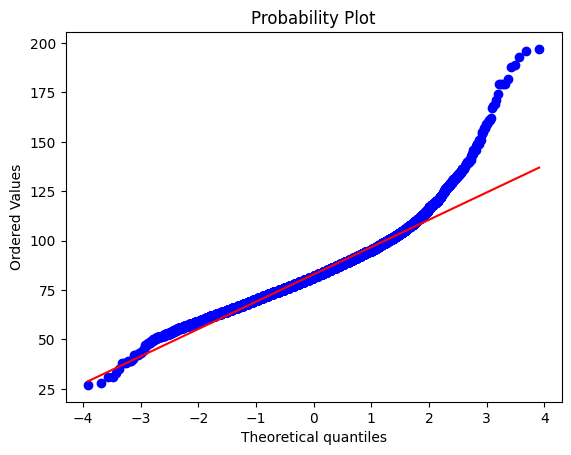

In [64]:
generate_qq_plot(data_df[target_dia])

Base Model

In [65]:
train_results_base_dia, test_results_base_dia, model_base_dia = fit_model(X_train_dia, Y_train_dia, X_test_dia,
                                                                        Y_test_dia, "LinearRegression")
model_base_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     405.1
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:16:05   Log-Likelihood:                -39014.
No. Observations:               10381   AIC:                         7.807e+04
Df Residuals:                   10358   BIC:                         7.824e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      15.8474      1.551     10.215      0.000      12.806      18.889
bundesland_Kärnten             -2.6525      1.429     -1.856      0.064      -5.455       0.149
bundesland_Niederösterreich    -0.8837      1.247     -0.709      0.478      -3.327       1.560
bundesland_Oberösterreich      -1.4941      1.385     -1.079      0.281      -4.208       1.220
bundesland_Salzburg            -1.6036      1.775     -0.903      0.366      -5.083       1.876
bundesland_Steiermark          -1.3619      1.095     -1.244      0.214      -3.508       0.784
bundesland_Tirol               -1.0987      1.954     -0.562      0.574      -4.930       2.732
bundesland_Vorarlberg           0.6322      2.817      0.224      0.822      -4.889       6.154
bundesland_Wien                -0.4016      1.237     -0.325      0.745      -2.826       2.023
bundesland_not_applicable      -1.6128      1.346     -1.198      0.231      -4.251       1.025
befinden_2                     -0.9251      0.230     -4.024      0.000      -1.376      -0.474
befinden_3                     -0.4581      0.327     -1.401      0.161      -1.099       0.183
befinden_4                      0.4931      0.961      0.513      0.608      -1.391       2.377
befinden_5                      3.5114      1.615      2.174      0.030       0.346       6.677
geschlecht_m                    0.9774      0.211      4.623      0.000       0.563       1.392
raucher_True                    0.4429      0.283      1.565      0.118      -0.112       0.998
blutzucker_bekannt_True        -0.0348      0.289     -0.121      0.904      -0.601       0.531
cholesterin_bekannt_True        0.3018      0.269      1.124      0.261      -0.225       0.828
in_behandlung_True             -1.9157      0.334     -5.733      0.000      -2.571      -1.261
schaetzwert_bp_sys             -0.0271      0.008     -3.424      0.001      -0.043      -0.012
schaetzwert_by_dia              0.1511      0.013     11.865      0.000       0.126       0.176
messwert_bp_sys                 0.5041      0.006     86.046      0.000       0.493       0.516
age                            -0.0800      0.007    -10.922      0.000      -0.094      -0.066
==============================================================================
Omnibus:                     1329.695   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4428.351
Skew:                           0.648   Prob(JB):                         0.00
Kurtosis:                       5.926   Cond. No.                     7.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

In [101]:
print(model_base_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      15.8474  &        1.551     &    10.215  &         0.000        &       12.806    &       18.889     \\
\textbf{bundesland\_Kärnten}          &      -2.6525  &        1.429     &    -1.856  &         0.064        &       -5.455    &        0.149     \\
\textbf{bundesland\_Niederösterreich} &      -0.8837  &        1.247     &    -0.709  &         0.478        &       -3.327    &        1.560     \\
\textbf{bundesland\_Oberösterreich}   &      -1.4941  &        1.385     &    -1.079  &         0.281        &       -4.208    &        1.220     \\
\textbf{bundesland\_Salzburg}         &      -1.6036  &        1.775     &    -0.903  &         0.366        &       -5.083    &        1.876     \\
\textbf{bundesland\_Steiermark}       &      -1.3

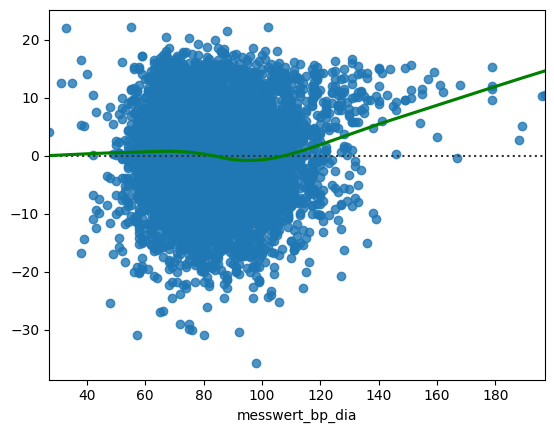

In [66]:
generate_residual_plot(Y_train_dia, model_base_dia)

Log Model

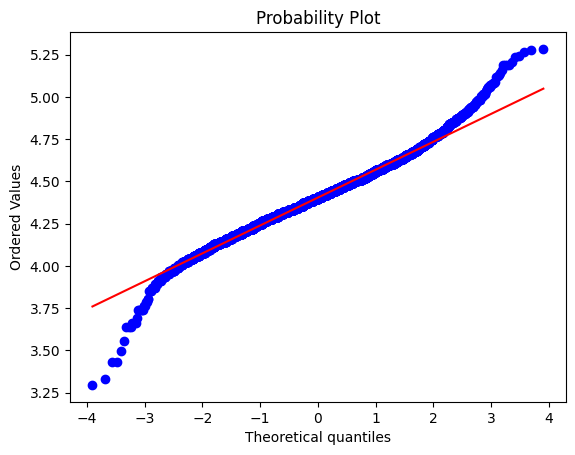

In [67]:
generate_qq_plot(np.log(data_df[target_dia]))

In [68]:
train_results_base_log_dia, test_results_base_log_dia, model_base_log_dia = fit_model(X_train_dia, np.log(Y_train_dia), X_test_dia,
                                                                        np.log(Y_test_dia), "LinearRegression")
model_base_log_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     408.5
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:16:05   Log-Likelihood:                 7174.3
No. Observations:               10381   AIC:                        -1.430e+04
Df Residuals:                   10358   BIC:                        -1.414e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       3.6071      0.018    198.937      0.000       3.572       3.643
bundesland_Kärnten             -0.0313      0.017     -1.871      0.061      -0.064       0.001
bundesland_Niederösterreich    -0.0122      0.015     -0.836      0.403      -0.041       0.016
bundesland_Oberösterreich      -0.0239      0.016     -1.475      0.140      -0.056       0.008
bundesland_Salzburg            -0.0188      0.021     -0.907      0.364      -0.059       0.022
bundesland_Steiermark          -0.0181      0.013     -1.413      0.158      -0.043       0.007
bundesland_Tirol               -0.0228      0.023     -0.997      0.319      -0.068       0.022
bundesland_Vorarlberg           0.0042      0.033      0.126      0.899      -0.060       0.069
bundesland_Wien                -0.0085      0.014     -0.588      0.557      -0.037       0.020
bundesland_not_applicable      -0.0260      0.016     -1.653      0.098      -0.057       0.005
befinden_2                     -0.0121      0.003     -4.515      0.000      -0.017      -0.007
befinden_3                     -0.0080      0.004     -2.105      0.035      -0.016      -0.001
befinden_4                     -0.0004      0.011     -0.040      0.968      -0.022       0.022
befinden_5                      0.0340      0.019      1.801      0.072      -0.003       0.071
geschlecht_m                    0.0097      0.002      3.944      0.000       0.005       0.015
raucher_True                    0.0057      0.003      1.737      0.082      -0.001       0.012
blutzucker_bekannt_True        -0.0019      0.003     -0.568      0.570      -0.009       0.005
cholesterin_bekannt_True        0.0049      0.003      1.552      0.121      -0.001       0.011
in_behandlung_True             -0.0251      0.004     -6.423      0.000      -0.033      -0.017
schaetzwert_bp_sys             -0.0003   9.26e-05     -3.231      0.001      -0.000      -0.000
schaetzwert_by_dia              0.0019      0.000     12.849      0.000       0.002       0.002
messwert_bp_sys                 0.0059   6.85e-05     86.068      0.000       0.006       0.006
age                            -0.0009   8.56e-05    -10.079      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      376.962   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              894.430
Skew:                          -0.197   Prob(JB):                    5.98e-195
Kurtosis:                       4.383   Cond. No.                     7.31e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

In [103]:
print(model_base_log_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &       3.6071  &        0.018     &   198.937  &         0.000        &        3.572    &        3.643     \\
\textbf{bundesland\_Kärnten}          &      -0.0313  &        0.017     &    -1.871  &         0.061        &       -0.064    &        0.001     \\
\textbf{bundesland\_Niederösterreich} &      -0.0122  &        0.015     &    -0.836  &         0.403        &       -0.041    &        0.016     \\
\textbf{bundesland\_Oberösterreich}   &      -0.0239  &        0.016     &    -1.475  &         0.140        &       -0.056    &        0.008     \\
\textbf{bundesland\_Salzburg}         &      -0.0188  &        0.021     &    -0.907  &         0.364        &       -0.059    &        0.022     \\
\textbf{bundesland\_Steiermark}       &      -0.0

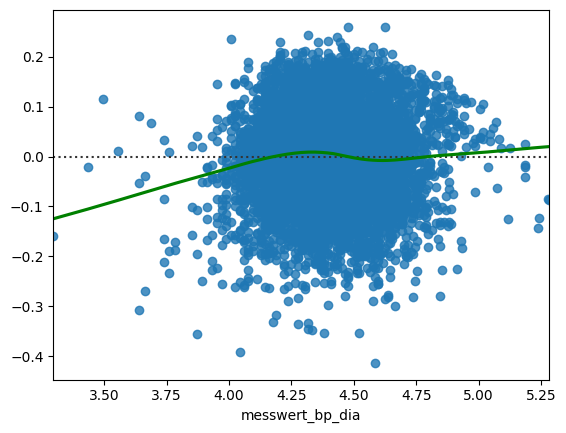

In [69]:
generate_residual_plot(np.log(Y_train_dia), model_base_log_dia)

Best Subset

In [70]:
model_type = "LinearRegression"
features = list(X_train_dia.columns)
model_best_dia, test_results_best_dia, train_results_best_dia = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_dia, Y_train_dia, X_test_dia, Y_test_dia,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys', 'age']
Train Results:  {'r_2': 0.46120238640212063, 'adjusted_r_2': 0.4606828130042442, 'mse': 107.87025223589706}
Test Results:  {'r_2': 0.4412160050619658, 'adjusted_r_2': 0.4399571990359733, 'mse': 113.39097626188146}


In [71]:
model_best_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     887.7
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:16:13   Log-Likelihood:                -39026.
No. Observations:               10381   AIC:                         7.807e+04
Df Residuals:                   10370   BIC:                         7.815e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   14.3111      1.094     13.076      0.000      12.166      16.456
befinden_5                   4.0494      1.609      2.516      0.012       0.895       7.204
geschlecht_m                 1.0008      0.211      4.737      0.000       0.587       1.415
raucher_True                 0.3865      0.282      1.369      0.171      -0.167       0.940
blutzucker_bekannt_True      0.0030      0.289      0.010      0.992      -0.563       0.569
cholesterin_bekannt_True     0.3220      0.268      1.200      0.230      -0.204       0.848
in_behandlung_True          -1.9435      0.333     -5.832      0.000      -2.597      -1.290
schaetzwert_bp_sys          -0.0279      0.008     -3.528      0.000      -0.043      -0.012
schaetzwert_by_dia           0.1509      0.013     11.857      0.000       0.126       0.176
messwert_bp_sys              0.5038      0.006     86.015      0.000       0.492       0.515
age                         -0.0840      0.007    -11.592      0.000      -0.098      -0.070
==============================================================================
Omnibus:                     1324.662   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4396.150
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       5.914   Cond. No.                     3.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
print(model_best_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                    & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                  &      14.3111  &        1.094     &    13.076  &         0.000        &       12.166    &       16.456     \\
\textbf{befinden\_5}                &       4.0494  &        1.609     &     2.516  &         0.012        &        0.895    &        7.204     \\
\textbf{geschlecht\_m}              &       1.0008  &        0.211     &     4.737  &         0.000        &        0.587    &        1.415     \\
\textbf{raucher\_True}              &       0.3865  &        0.282     &     1.369  &         0.171        &       -0.167    &        0.940     \\
\textbf{blutzucker\_bekannt\_True}  &       0.0030  &        0.289     &     0.010  &         0.992        &       -0.563    &        0.569     \\
\textbf{cholesterin\_bekannt\_True} &       0.3220  &        

Best Subset Log

In [72]:
model_type = "LinearRegression"
features = list(X_train_dia.columns)
model_best_log_dia, test_results_best_log_dia, train_results_best_log_dia = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_dia, np.log(Y_train_dia), X_test_dia, np.log(Y_test_dia),
                                                     model_type, {}, 1)


Best Model: 
Features:  ['befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_sys', 'age']
Train Results:  {'r_2': 0.4641648222328041, 'adjusted_r_2': 0.46349289618756695, 'mse': 0.014708431918802166}
Test Results:  {'r_2': 0.44728578013058984, 'adjusted_r_2': 0.44566601348083734, 'mse': 0.01529516959549001}


In [73]:
model_best_log_dia.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_dia   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     690.8
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:16:20   Log-Likelihood:                 7170.5
No. Observations:               10381   AIC:                        -1.431e+04
Df Residuals:                   10367   BIC:                        -1.421e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.5892      0.013    280.341      0.000       3.564       3.614
befinden_2                  -0.0122      0.003     -4.545      0.000      -0.017      -0.007
befinden_3                  -0.0082      0.004     -2.157      0.031      -0.016      -0.001
befinden_4                  -0.0002      0.011     -0.017      0.987      -0.022       0.022
befinden_5                   0.0341      0.019      1.810      0.070      -0.003       0.071
geschlecht_m                 0.0097      0.002      3.928      0.000       0.005       0.015
raucher_True                 0.0057      0.003      1.714      0.087      -0.001       0.012
blutzucker_bekannt_True     -0.0018      0.003     -0.533      0.594      -0.008       0.005
cholesterin_bekannt_True     0.0051      0.003      1.635      0.102      -0.001       0.011
in_behandlung_True          -0.0250      0.004     -6.405      0.000      -0.033      -0.017
schaetzwert_bp_sys          -0.0003   9.25e-05     -3.250      0.001      -0.000      -0.000
schaetzwert_by_dia           0.0019      0.000     12.864      0.000       0.002       0.002
messwert_bp_sys              0.0059   6.84e-05     86.145      0.000       0.006       0.006
age                         -0.0009   8.55e-05    -10.082      0.000      -0.001      -0.001
==============================================================================
Omnibus:                      379.145   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              902.866
Skew:                          -0.197   Prob(JB):                    8.82e-197
Kurtosis:                       4.390   Cond. No.                     3.17e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
print(model_best_log_dia.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                    & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                  &       3.5892  &        0.013     &   280.341  &         0.000        &        3.564    &        3.614     \\
\textbf{befinden\_2}                &      -0.0122  &        0.003     &    -4.545  &         0.000        &       -0.017    &       -0.007     \\
\textbf{befinden\_3}                &      -0.0082  &        0.004     &    -2.157  &         0.031        &       -0.016    &       -0.001     \\
\textbf{befinden\_4}                &      -0.0002  &        0.011     &    -0.017  &         0.987        &       -0.022    &        0.022     \\
\textbf{befinden\_5}                &       0.0341  &        0.019     &     1.810  &         0.070        &       -0.003    &        0.071     \\
\textbf{geschlecht\_m}              &       0.0097  &        

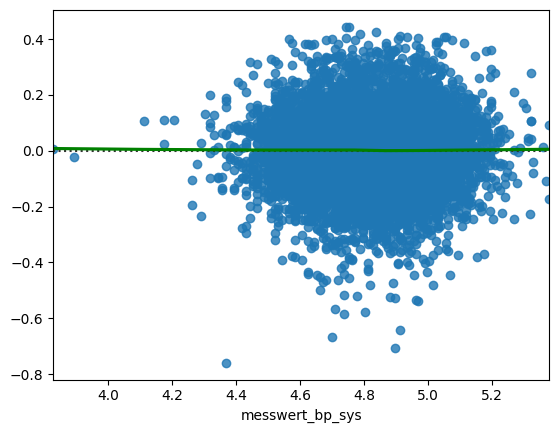

In [74]:
generate_residual_plot(np.log(Y_train_sys), model_best_log_dia)

In [93]:
train_result_list = [train_results_base_dia, train_results_base_log_dia, train_results_best_dia, train_results_best_log_dia]

test_result_list = [test_results_base_dia, test_results_base_log_dia, test_results_best_dia, test_results_best_log_dia]

model_names = ["LM (Base)", "LM (Best Subset)", "LM Log", "LM Log (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),107.607,113.488,0.463,0.441,0.461,0.438
1,LM (Best Subset),0.015,0.015,0.465,0.447,0.463,0.444
2,LM Log,113.391,107.870,0.441,0.461,0.440,0.461
3,LM Log (Best Subset),0.015,0.015,0.447,0.464,0.446,0.463


In [94]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 107.607121 & 113.488247 & 0.462517 & 0.440737 & 0.461375 & 0.437957 \\
1 & LM (Best Subset) & 0.014697 & 0.015307 & 0.464566 & 0.446854 & 0.463429 & 0.444105 \\
2 & LM Log & 113.390976 & 107.870252 & 0.441216 & 0.461202 & 0.439957 & 0.460683 \\
3 & LM Log (Best Subset) & 0.015295 & 0.014708 & 0.447286 & 0.464165 & 0.445666 & 0.463493 \\
\bottomrule
\end{tabular}



### Models for Systolic as target

In [76]:
target_sys = "messwert_bp_sys"
X_train_sys, Y_train_sys = separate_target(encoded_train_set, target_sys)
X_test_sys, Y_test_sys = separate_target(encoded_test_set, target_sys)

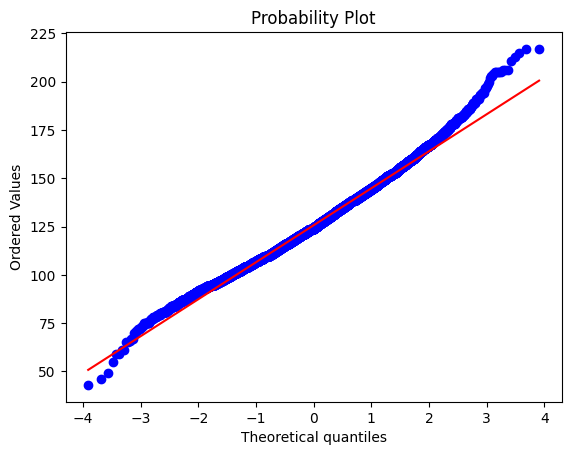

In [77]:
generate_qq_plot(data_df[target_sys])

Base Model

In [78]:
train_results_base_sys, test_results_base_sys, model_base_sys = fit_model(X_train_sys, Y_train_sys, X_test_sys,
                                                                        Y_test_sys, "LinearRegression")
model_base_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     527.2
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:16:21   Log-Likelihood:                -41583.
No. Observations:               10381   AIC:                         8.321e+04
Df Residuals:                   10358   BIC:                         8.338e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      28.8163      1.977     14.576      0.000      24.941      32.692
bundesland_Kärnten              1.5792      1.831      0.862      0.388      -2.010       5.169
bundesland_Niederösterreich    -0.5325      1.597     -0.333      0.739      -3.662       2.598
bundesland_Oberösterreich      -0.3381      1.774     -0.191      0.849      -3.815       3.138
bundesland_Salzburg            -1.7697      2.274     -0.778      0.436      -6.226       2.687
bundesland_Steiermark           0.5564      1.402      0.397      0.692      -2.193       3.305
bundesland_Tirol               -2.3237      2.503     -0.928      0.353      -7.230       2.583
bundesland_Vorarlberg          -5.7098      3.608     -1.583      0.114     -12.781       1.362
bundesland_Wien                -0.3693      1.584     -0.233      0.816      -3.475       2.736
bundesland_not_applicable      -0.5502      1.724     -0.319      0.750      -3.930       2.829
befinden_2                      0.9187      0.295      3.119      0.002       0.341       1.496
befinden_3                      0.0713      0.419      0.170      0.865      -0.750       0.892
befinden_4                     -1.1268      1.231     -0.915      0.360      -3.540       1.286
befinden_5                     -1.1299      2.069     -0.546      0.585      -5.185       2.926
geschlecht_m                    1.2305      0.271      4.544      0.000       0.700       1.761
raucher_True                   -0.5668      0.363     -1.563      0.118      -1.278       0.144
blutzucker_bekannt_True         0.8439      0.370      2.282      0.023       0.119       1.569
cholesterin_bekannt_True       -0.6059      0.344     -1.762      0.078      -1.280       0.068
in_behandlung_True              4.3396      0.427     10.174      0.000       3.504       5.176
schaetzwert_bp_sys              0.1726      0.010     17.244      0.000       0.153       0.192
schaetzwert_by_dia             -0.0592      0.016     -3.609      0.000      -0.091      -0.027
messwert_bp_dia                 0.8270      0.010     86.046      0.000       0.808       0.846
age                             0.2188      0.009     23.815      0.000       0.201       0.237
==============================================================================
Omnibus:                       85.955   Durbin-Watson:                   2.035
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.963
Skew:                           0.157   Prob(JB):                     4.38e-23
Kurtosis:                       3.374   Cond. No.                     6.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

In [107]:
print(model_base_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &      28.8163  &        1.977     &    14.576  &         0.000        &       24.941    &       32.692     \\
\textbf{bundesland\_Kärnten}          &       1.5792  &        1.831     &     0.862  &         0.388        &       -2.010    &        5.169     \\
\textbf{bundesland\_Niederösterreich} &      -0.5325  &        1.597     &    -0.333  &         0.739        &       -3.662    &        2.598     \\
\textbf{bundesland\_Oberösterreich}   &      -0.3381  &        1.774     &    -0.191  &         0.849        &       -3.815    &        3.138     \\
\textbf{bundesland\_Salzburg}         &      -1.7697  &        2.274     &    -0.778  &         0.436        &       -6.226    &        2.687     \\
\textbf{bundesland\_Steiermark}       &       0.5

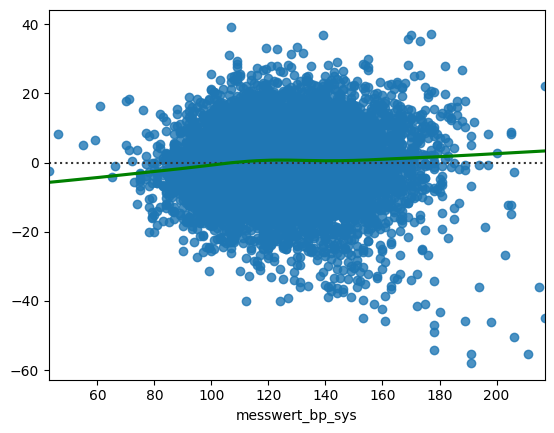

In [79]:
generate_residual_plot(Y_train_sys, model_base_sys)

Base Log Model

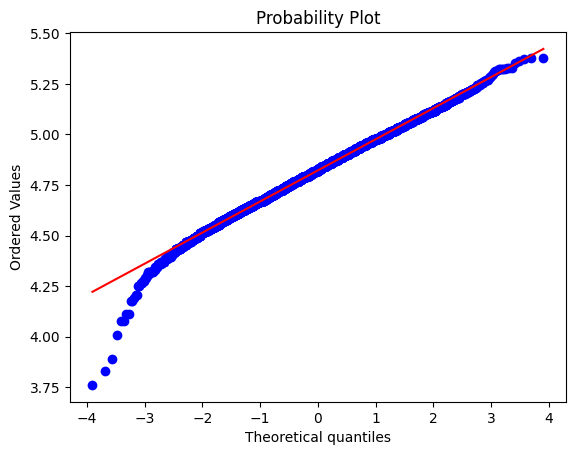

In [80]:
generate_qq_plot(np.log(data_df[target_sys]))

In [81]:
train_results_base_log_sys, test_results_base_log_sys, model_base_log_sys = fit_model(X_train_sys, np.log(Y_train_sys), X_test_sys,
                                                                        np.log(Y_test_sys), "LinearRegression")
model_base_log_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     497.4
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:16:22   Log-Likelihood:                 8389.0
No. Observations:               10381   AIC:                        -1.673e+04
Df Residuals:                   10358   BIC:                        -1.657e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       4.0520      0.016    252.508      0.000       4.021       4.083
bundesland_Kärnten              0.0122      0.015      0.823      0.410      -0.017       0.041
bundesland_Niederösterreich    -0.0058      0.013     -0.448      0.654      -0.031       0.020
bundesland_Oberösterreich      -0.0076      0.014     -0.525      0.600      -0.036       0.021
bundesland_Salzburg            -0.0179      0.018     -0.972      0.331      -0.054       0.018
bundesland_Steiermark           0.0034      0.011      0.296      0.767      -0.019       0.026
bundesland_Tirol               -0.0245      0.020     -1.205      0.228      -0.064       0.015
bundesland_Vorarlberg          -0.0509      0.029     -1.738      0.082      -0.108       0.006
bundesland_Wien                -0.0053      0.013     -0.409      0.683      -0.030       0.020
bundesland_not_applicable      -0.0096      0.014     -0.686      0.493      -0.037       0.018
befinden_2                      0.0061      0.002      2.545      0.011       0.001       0.011
befinden_3                    1.98e-05      0.003      0.006      0.995      -0.007       0.007
befinden_4                     -0.0092      0.010     -0.921      0.357      -0.029       0.010
befinden_5                     -0.0094      0.017     -0.559      0.576      -0.042       0.024
geschlecht_m                    0.0113      0.002      5.140      0.000       0.007       0.016
raucher_True                   -0.0041      0.003     -1.381      0.167      -0.010       0.002
blutzucker_bekannt_True         0.0060      0.003      2.015      0.044       0.000       0.012
cholesterin_bekannt_True       -0.0036      0.003     -1.279      0.201      -0.009       0.002
in_behandlung_True              0.0299      0.003      8.648      0.000       0.023       0.037
schaetzwert_bp_sys              0.0014   8.12e-05     16.840      0.000       0.001       0.002
schaetzwert_by_dia             -0.0004      0.000     -2.902      0.004      -0.001      -0.000
messwert_bp_dia                 0.0065    7.8e-05     83.621      0.000       0.006       0.007
age                             0.0017   7.46e-05     23.126      0.000       0.002       0.002
==============================================================================
Omnibus:                      208.093   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.127
Skew:                          -0.267   Prob(JB):                     1.63e-58
Kurtosis:                       3.574   Cond. No.                     6.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condi

In [109]:
print(model_base_log_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                      & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                    &       4.0520  &        0.016     &   252.508  &         0.000        &        4.021    &        4.083     \\
\textbf{bundesland\_Kärnten}          &       0.0122  &        0.015     &     0.823  &         0.410        &       -0.017    &        0.041     \\
\textbf{bundesland\_Niederösterreich} &      -0.0058  &        0.013     &    -0.448  &         0.654        &       -0.031    &        0.020     \\
\textbf{bundesland\_Oberösterreich}   &      -0.0076  &        0.014     &    -0.525  &         0.600        &       -0.036    &        0.021     \\
\textbf{bundesland\_Salzburg}         &      -0.0179  &        0.018     &    -0.972  &         0.331        &       -0.054    &        0.018     \\
\textbf{bundesland\_Steiermark}       &       0.0

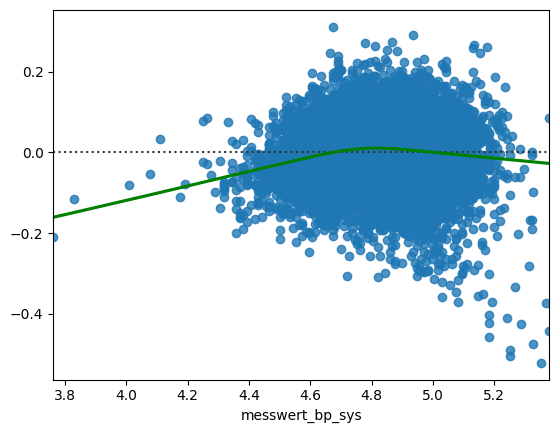

In [82]:
generate_residual_plot(np.log(Y_train_sys), model_base_log_sys)

Base Best Subset

In [83]:
model_type = "LinearRegression"
features = list(X_train_sys.columns)
model_best_sys, test_results_best_sys, train_results_best_sys = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_sys, Y_train_sys, X_test_sys, Y_test_sys,
                                                     model_type, {}, 1)


Best Model: 
Features:  ['bundesland_Salzburg', 'bundesland_Steiermark', 'bundesland_Tirol', 'bundesland_Vorarlberg', 'bundesland_Wien', 'bundesland_not_applicable', 'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_dia', 'age']
Train Results:  {'r_2': 0.5281244703187511, 'adjusted_r_2': 0.5272591450543997, 'mse': 176.57520890377447}
Test Results:  {'r_2': 0.5126535025613861, 'adjusted_r_2': 0.5105633031367058, 'mse': 175.68363572799177}


In [84]:
model_best_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     610.3
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:16:30   Log-Likelihood:                -41584.
No. Observations:               10381   AIC:                         8.321e+04
Df Residuals:                   10361   BIC:                         8.335e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    28.7973      1.479     19.469      0.000      25.898      31.697
bundesland_Salzburg          -1.7600      1.868     -0.942      0.346      -5.422       1.902
bundesland_Steiermark         0.5675      0.538      1.056      0.291      -0.486       1.621
bundesland_Tirol             -2.3132      2.142     -1.080      0.280      -6.512       1.886
bundesland_Vorarlberg        -5.7014      3.368     -1.693      0.090     -12.303       0.900
bundesland_Wien              -0.3568      0.913     -0.391      0.696      -2.146       1.432
bundesland_not_applicable    -0.5417      1.138     -0.476      0.634      -2.772       1.689
befinden_2                    0.9232      0.294      3.135      0.002       0.346       1.500
befinden_3                    0.0783      0.419      0.187      0.852      -0.743       0.899
befinden_4                   -1.1206      1.231     -0.910      0.363      -3.534       1.292
befinden_5                   -1.1334      2.069     -0.548      0.584      -5.189       2.922
geschlecht_m                  1.2283      0.271      4.536      0.000       0.698       1.759
raucher_True                 -0.5680      0.363     -1.566      0.117      -1.279       0.143
blutzucker_bekannt_True       0.8402      0.370      2.272      0.023       0.115       1.565
cholesterin_bekannt_True     -0.6186      0.344     -1.799      0.072      -1.293       0.055
in_behandlung_True            4.3440      0.426     10.187      0.000       3.508       5.180
schaetzwert_bp_sys            0.1725      0.010     17.242      0.000       0.153       0.192
schaetzwert_by_dia           -0.0590      0.016     -3.595      0.000      -0.091      -0.027
messwert_bp_dia               0.8269      0.010     86.053      0.000       0.808       0.846
age                           0.2189      0.009     23.846      0.000       0.201       0.237
==============================================================================
Omnibus:                       86.311   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.433
Skew:                           0.157   Prob(JB):                     3.47e-23
Kurtosis:                       3.375   Cond. No.                     4.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
print(model_best_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                     & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                   &      28.7973  &        1.479     &    19.469  &         0.000        &       25.898    &       31.697     \\
\textbf{bundesland\_Salzburg}        &      -1.7600  &        1.868     &    -0.942  &         0.346        &       -5.422    &        1.902     \\
\textbf{bundesland\_Steiermark}      &       0.5675  &        0.538     &     1.056  &         0.291        &       -0.486    &        1.621     \\
\textbf{bundesland\_Tirol}           &      -2.3132  &        2.142     &    -1.080  &         0.280        &       -6.512    &        1.886     \\
\textbf{bundesland\_Vorarlberg}      &      -5.7014  &        3.368     &    -1.693  &         0.090        &      -12.303    &        0.900     \\
\textbf{bundesland\_Wien}            &      -0.3568  & 

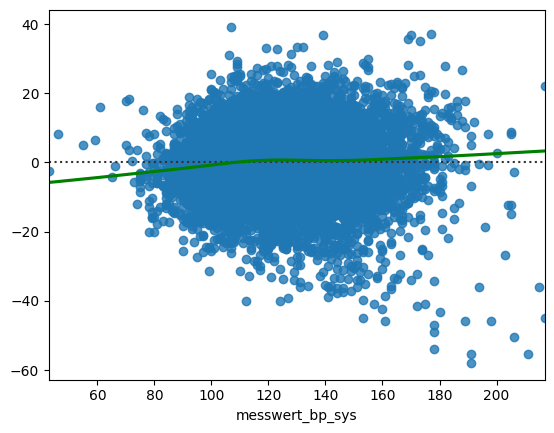

In [85]:
generate_residual_plot(Y_train_sys, model_best_sys)

Best Subset Log Model

In [86]:
model_type = "LinearRegression"
features = list(X_train_sys.columns)
model_best_log_sys, test_results_best_log_sys, train_results_best_log_sys = best_subset_selection(features, BEST_SUBSET_CRITERION, X_train_sys, np.log(Y_train_sys), X_test_sys, np.log(Y_test_sys),
                                                     model_type, {}, 1)


Best Model: 
Features:  ['bundesland_Oberösterreich', 'bundesland_Salzburg', 'bundesland_Steiermark', 'bundesland_Tirol', 'bundesland_Vorarlberg', 'bundesland_Wien', 'bundesland_not_applicable', 'befinden_2', 'befinden_3', 'befinden_4', 'befinden_5', 'geschlecht_m', 'raucher_True', 'blutzucker_bekannt_True', 'cholesterin_bekannt_True', 'in_behandlung_True', 'schaetzwert_bp_sys', 'schaetzwert_by_dia', 'messwert_bp_dia', 'age']
Train Results:  {'r_2': 0.5136300954572703, 'adjusted_r_2': 0.5126911574176125, 'mse': 0.011633557932152434}
Test Results:  {'r_2': 0.4991479169808267, 'adjusted_r_2': 0.4968862232214265, 'mse': 0.011617657436000541}


In [87]:
model_best_log_sys.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        messwert_bp_sys   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     547.0
Date:                Wed, 10 May 2023   Prob (F-statistic):               0.00
Time:                        04:16:37   Log-Likelihood:                 8387.8
No. Observations:               10381   AIC:                        -1.673e+04
Df Residuals:                   10360   BIC:                        -1.658e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     4.0517      0.012    330.484      0.000       4.028       4.076
bundesland_Oberösterreich    -0.0072      0.010     -0.716      0.474      -0.027       0.013
bundesland_Salzburg          -0.0176      0.015     -1.149      0.251      -0.048       0.012
bundesland_Steiermark         0.0037      0.005      0.751      0.453      -0.006       0.013
bundesland_Tirol             -0.0242      0.018     -1.378      0.168      -0.059       0.010
bundesland_Vorarlberg        -0.0506      0.027     -1.845      0.065      -0.104       0.003
bundesland_Wien              -0.0049      0.008     -0.635      0.525      -0.020       0.010
bundesland_not_applicable    -0.0093      0.010     -0.977      0.329      -0.028       0.009
befinden_2                    0.0061      0.002      2.554      0.011       0.001       0.011
befinden_3                 9.898e-05      0.003      0.029      0.977      -0.007       0.007
befinden_4                   -0.0092      0.010     -0.916      0.359      -0.029       0.010
befinden_5                   -0.0094      0.017     -0.558      0.577      -0.042       0.024
geschlecht_m                  0.0113      0.002      5.134      0.000       0.007       0.016
raucher_True                 -0.0041      0.003     -1.386      0.166      -0.010       0.002
blutzucker_bekannt_True       0.0060      0.003      2.002      0.045       0.000       0.012
cholesterin_bekannt_True     -0.0037      0.003     -1.315      0.188      -0.009       0.002
in_behandlung_True            0.0300      0.003      8.654      0.000       0.023       0.037
schaetzwert_bp_sys            0.0014   8.12e-05     16.840      0.000       0.001       0.002
schaetzwert_by_dia           -0.0004      0.000     -2.893      0.004      -0.001      -0.000
messwert_bp_dia               0.0065    7.8e-05     83.618      0.000       0.006       0.007
age                           0.0017   7.46e-05     23.134      0.000       0.002       0.002
==============================================================================
Omnibus:                      208.066   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              266.356
Skew:                          -0.267   Prob(JB):                     1.45e-58
Kurtosis:                       3.575   Cond. No.                     4.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
print(model_best_log_sys.summary().tables[1].as_latex_tabular())

\begin{center}
\begin{tabular}{lcccccc}
\toprule
                                     & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{Intercept}                   &       4.0517  &        0.012     &   330.484  &         0.000        &        4.028    &        4.076     \\
\textbf{bundesland\_Oberösterreich}  &      -0.0072  &        0.010     &    -0.716  &         0.474        &       -0.027    &        0.013     \\
\textbf{bundesland\_Salzburg}        &      -0.0176  &        0.015     &    -1.149  &         0.251        &       -0.048    &        0.012     \\
\textbf{bundesland\_Steiermark}      &       0.0037  &        0.005     &     0.751  &         0.453        &       -0.006    &        0.013     \\
\textbf{bundesland\_Tirol}           &      -0.0242  &        0.018     &    -1.378  &         0.168        &       -0.059    &        0.010     \\
\textbf{bundesland\_Vorarlberg}      &      -0.0506  & 

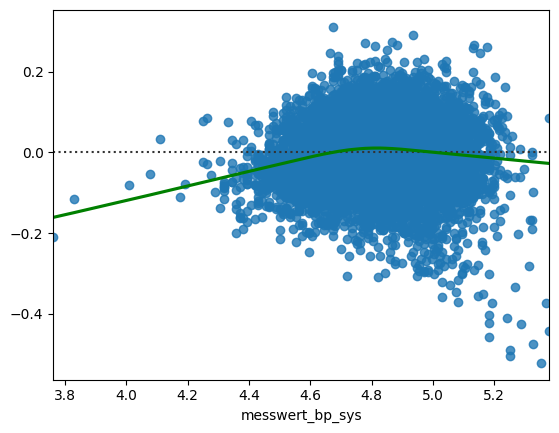

In [88]:
generate_residual_plot(np.log(Y_train_sys), model_best_log_sys)

In [91]:
train_result_list = [train_results_base_sys, train_results_base_log_sys, train_results_best_sys, train_results_best_log_sys]

test_result_list = [test_results_base_sys, test_results_base_log_sys, test_results_best_sys, test_results_best_log_sys]

model_names = ["LM (Base)", "LM (Best Subset)", "LM Log", "LM Log (Best Subset)"]

tab = tabularize_model_metrics(train_result_list, test_result_list, model_names)
round(tab, 3)

,Model,Train Mean Sq Error,Test Mean Sq Error,Train R2,Test R2,Train Adjusted R2,Test Adjusted R2
0,LM (Base),176.535,175.716,0.528,0.513,0.527,0.510
1,LM (Best Subset),0.012,0.012,0.514,0.499,0.513,0.497
2,LM Log,175.684,176.575,0.513,0.528,0.511,0.527
3,LM Log (Best Subset),0.012,0.012,0.499,0.514,0.497,0.513


In [92]:
print(tab.to_latex())

\begin{tabular}{llrrrrrr}
\toprule
 & Model & Train Mean Sq Error & Test Mean Sq Error & Train R2 & Test R2 & Train Adjusted R2 & Test Adjusted R2 \\
\midrule
0 & LM (Base) & 176.535352 & 175.716247 & 0.528231 & 0.512563 & 0.527229 & 0.510141 \\
1 & LM (Best Subset) & 0.011631 & 0.011620 & 0.513746 & 0.499064 & 0.512713 & 0.496575 \\
2 & LM Log & 175.683636 & 176.575209 & 0.512654 & 0.528124 & 0.510563 & 0.527259 \\
3 & LM Log (Best Subset) & 0.011618 & 0.011634 & 0.499148 & 0.513630 & 0.496886 & 0.512691 \\
\bottomrule
\end{tabular}

